In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus     
import os

from sklearn import preprocessing

In [50]:
sepsis_data = pd.read_csv('데이타모음집.csv')
sepsis_data

,ID,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,SepsisLabel,Unnamed: 11
0,1,0.047972,0.017303,0.010527,0.112112,0.106352,NaN,0.136890,0.693,0,0,NaN
1,2,0.040722,0.010690,0.003791,0.100903,0.073601,0.035480,0.155592,0.633,0,0,NaN
2,3,0.033570,0.008276,0.014140,0.044773,0.039272,0.026293,0.141573,0.382,0,0,NaN
3,4,0.031686,0.007248,0.006563,0.045069,0.050242,0.030648,0.124749,0.548,0,0,NaN
4,5,0.037933,0.003708,0.010588,0.049541,0.043159,NaN,0.059628,0.234,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
356,357,0.027314,0.011646,0.030472,0.087596,0.047398,0.043652,NaN,0.400,0,1,NaN
357,358,0.046702,0.011487,0.010689,0.043213,0.037809,0.042181,0.136070,0.242,1,1,NaN
358,359,0.047050,0.015565,0.017595,0.089691,0.073383,0.072551,0.079367,0.508,1,1,NaN
359,360,0.033416,0.010014,0.012147,0.088800,0.053182,0.037222,0.096051,0.600,0,1,NaN


In [53]:
X = sepsis_data.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
sepsis_data = pd.DataFrame(X_scaled,columns = sepsis_data.columns)

sepsis_data = sepsis_data
sepsis_data

,ID,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,SepsisLabel,Unnamed: 11
0,0.000000,0.242640,0.324148,0.247549,0.593917,0.895355,0.000000,0.292378,0.784808,0.0,0.0,0.0
1,0.002778,0.204567,0.200262,0.089148,0.534537,0.619631,0.154022,0.332323,0.692583,0.0,0.0,0.0
2,0.005556,0.167008,0.155039,0.332510,0.237187,0.330622,0.114140,0.302380,0.306776,0.0,0.0,0.0
3,0.008333,0.157114,0.135781,0.154333,0.238755,0.422977,0.133046,0.266447,0.561931,0.0,0.0,0.0
4,0.011111,0.189920,0.069464,0.248983,0.262445,0.363346,0.000000,0.127357,0.079287,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.988889,0.134155,0.218172,0.716567,0.464043,0.399034,0.189497,0.000000,0.334443,0.0,1.0,0.0
357,0.991667,0.235971,0.215193,0.251358,0.228922,0.318306,0.183111,0.290627,0.091584,1.0,1.0,0.0
358,0.994444,0.237798,0.291589,0.413757,0.475141,0.617796,0.314950,0.169517,0.500448,1.0,1.0,0.0
359,0.997222,0.166199,0.187598,0.285644,0.470421,0.447728,0.161584,0.205152,0.641860,0.0,1.0,0.0


In [52]:
sepsis_data = sepsis_data.replace(np.nan,0)
sepsis_data

,ID,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,SepsisLabel,Unnamed: 11
0,1,0.047972,0.017303,0.010527,0.112112,0.106352,0.000000,0.136890,0.693,0,0,0.0
1,2,0.040722,0.010690,0.003791,0.100903,0.073601,0.035480,0.155592,0.633,0,0,0.0
2,3,0.033570,0.008276,0.014140,0.044773,0.039272,0.026293,0.141573,0.382,0,0,0.0
3,4,0.031686,0.007248,0.006563,0.045069,0.050242,0.030648,0.124749,0.548,0,0,0.0
4,5,0.037933,0.003708,0.010588,0.049541,0.043159,0.000000,0.059628,0.234,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
356,357,0.027314,0.011646,0.030472,0.087596,0.047398,0.043652,0.000000,0.400,0,1,0.0
357,358,0.046702,0.011487,0.010689,0.043213,0.037809,0.042181,0.136070,0.242,1,1,0.0
358,359,0.047050,0.015565,0.017595,0.089691,0.073383,0.072551,0.079367,0.508,1,1,0.0
359,360,0.033416,0.010014,0.012147,0.088800,0.053182,0.037222,0.096051,0.600,0,1,0.0


In [35]:
X = np.array(pd.DataFrame(sepsis_data, columns=['HR','O2Sat','Temp','SBP','MAP','DBP','Resp'
                                                ,'Age','Gender']))

In [36]:
y = np.array(pd.DataFrame(sepsis_data, columns=['SepsisLabel']))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [38]:
dt_clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [39]:
dt_clf = dt_clf.fit(X_train, y_train)

In [40]:
dt_prediction = dt_clf.predict(X_test)

In [41]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [42]:
feature_names = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp' ,'Age','Gender']

In [43]:
feature_names = feature_names[0:9]
print(feature_names)

['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender']


In [44]:
target_name = np.array(['Sepsis No', 'Sepsis Yes'])

In [54]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True
                                  )

In [55]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

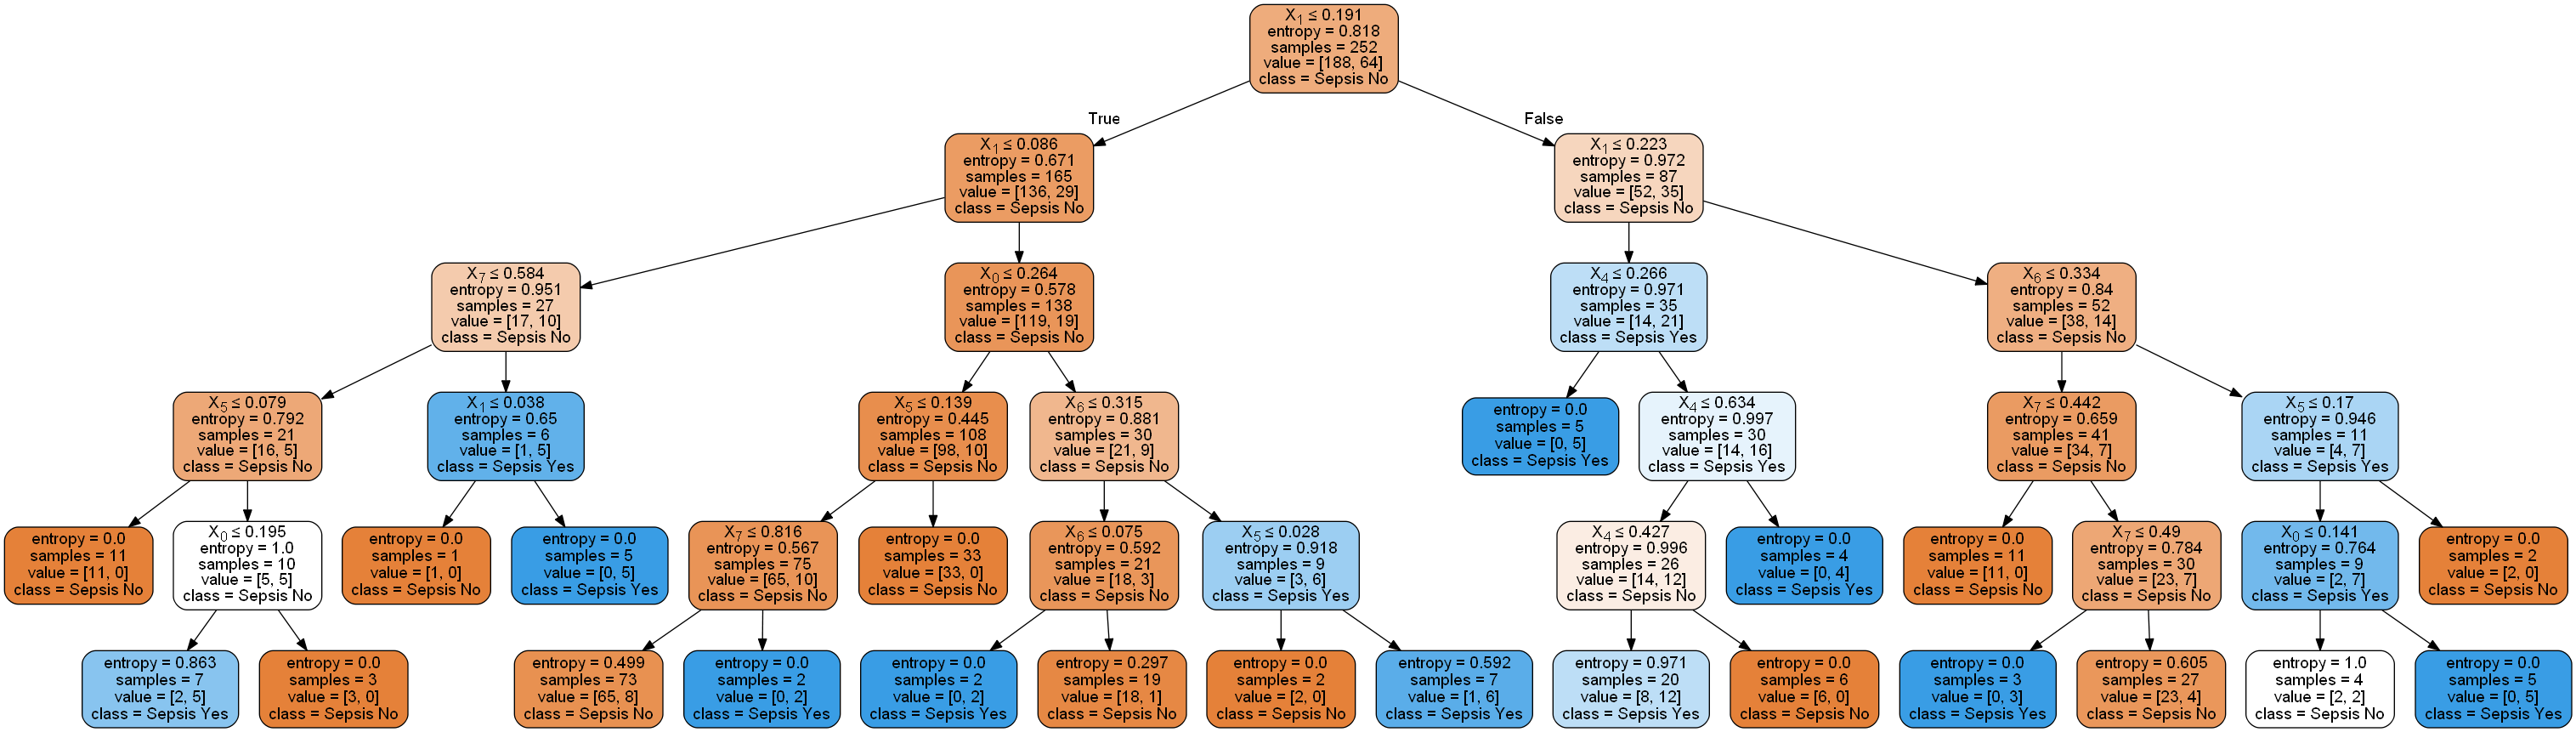

In [56]:
Image(dt_graph.create_png())

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, dt_prediction))

Accuracy: 0.5871559633027523
